# Método apply en lugar de concatenar métodos

In [ ]:
import yfinance as yf
import pandas as pd

data = yf.download('AAPL', auto_adjust=True)

data['variacion'] = data['Close'].pct_change()
data.variacion.groupby(data.index.year).apply(pd.DataFrame.kurtosis).head(10)

[*********************100%***********************]  1 of 1 completed


Date
1980   -0.676791
1981    0.602679
1982    0.432410
1983    6.148993
1984    1.006889
1985    1.183468
1986    0.375297
1987    9.123420
1988    2.185373
1989    2.884414
Name: variacion, dtype: float64

In [ ]:
data.variacion.groupby(data.index.year).apply(pd.DataFrame.kurt).head(10)

Date
1980   -0.676791
1981    0.602679
1982    0.432410
1983    6.148993
1984    1.006889
1985    1.183468
1986    0.375297
1987    9.123420
1988    2.185373
1989    2.884414
Name: variacion, dtype: float64

# Combinaciones de filtros y agrupamientos

In [ ]:
data = yf.download('AAPL', auto_adjust=True)

# Calculo las variaciones
data['variaciones'] = data['Close'].pct_change()*100

# Filtramos las variaciones > 10%
filtro = data.loc[ data['variaciones'] > 10 ]

# Contabilizamos por año ese filtro
agrupados = filtro.variaciones.groupby(filtro.index.year).count().to_frame()
agrupados.columns = ['Subas +10%']
agrupados

[*********************100%***********************]  1 of 1 completed


,Subas +10%
Date,
1982,1
1983,3
1984,1
1987,3
1990,1
1993,1
1994,3
1996,2
1997,4


## ¿Y al reves? primero agrupamiento y luego filtro? ¿cuando usar cada variante?

Ejemplo: Ver semanas con rendimiento mayor al 13% (ponele)

In [ ]:
data = yf.download('AAPL', auto_adjust=True)
data['factor']=data.Close.pct_change()+1

yields = pd.DataFrame()

# Ver tema advertencias
# yields['Yield'] = (data.factor.groupby([data.index.year, data.index.week]).prod() -1)*100

yields['Yield'] = (data.factor.groupby([data.index.year, data.index.isocalendar().week]).prod() -1)*100
filtro = yields.loc[yields.Yield >13]
filtro.head(20)

[*********************100%***********************]  1 of 1 completed


Yield
Date week           
1980 52    25.663737
1981 12    15.730398
     17    15.999907
     21    14.090786
     29    16.292132
     40    15.790023
     51    22.001110
1982 28    16.484528
     34    14.407416
     40    27.027758
     44    18.719809
1983 2     19.999463
     3     13.258182
     15    16.190580
     35    23.076893
     50    14.451003
1984 1     15.331032
1986 33    13.043313
1987 7     15.046621
     9     14.285500

## ¿Y Combinar agrupamiento y ordenamiento? ¿para que sirve esta combinación?


Ejemplo, buscar las 10 semanas con mayor rendimiento, e indicar nro de semana y año


In [ ]:
data = yf.download('AAPL', auto_adjust=True)
data['factor']=data.Close.pct_change()+1

yields = pd.DataFrame()
yields['Yield'] = (data.factor.groupby([data.index.year, data.index.isocalendar().week]).prod() -1)*100
ordenado = yields.sort_values("Yield", ascending=False)
ordenado.index.names = ['Año','Semana']
ordenado.head(10)

[*********************100%***********************]  1 of 1 completed


,,Yield
Año,Semana,
1997,32,39.739247
1982,40,27.027760
2003,19,26.643586
1980,52,25.663707
1993,41,24.861714
1998,1,23.808700
1983,35,23.076874
1981,51,22.001105
1999,48,20.973139


# Resampleo

Mediante el metodo resample podemos reagrupar rapidamente en funcion de diferentes timeframes una serie dada
<br><b>Es importante aclarar que para que funcione el resampleo el indice de la tabla debe ser el timestamp</b>

Las Frecuencias posibles son
* B = business day frequency
* D = calendar day frequency
* W = weekly frequency
* M = month end frequency
* BM = business month end frequency
* MS = month start frequency
* BMS = business month start frequency
* Q = quarter end frequency
* BQ = business quarter endfrequency
* QS = quarter start frequency
* BQS = business quarter start frequency
* A = year end frequency
* BA = business year end frequency
* AS = year start frequency
* BAS = business year start frequency
* BH = business hour frequency
* H = hourly frequency
* T = minutely frequency
* S = secondly frequency
* L = milliseonds

## Jugando con la fecha de resampleo y la de la muestra.. ojo ahi

In [ ]:
data = yf.download('AAPL', auto_adjust=True)

opens = data.resample('2W').Open.first() # cada 2 semanas primer dato
closes = data.resample('2W').Close.last() # cada 2 semanas ultimo dato

resampleada = pd.concat([opens,closes], axis=1)
resampleada

[*********************100%***********************]  1 of 1 completed


,Open,Close
Date,,
1980-12-14,0.099584,0.099584
1980-12-28,0.094821,0.122964
1981-01-11,0.124696,0.110408
1981-01-25,0.110408,0.113439
1981-02-08,0.112140,0.099584
...,...,...
2023-04-23,161.197025,164.792068
2023-05-07,164.772093,173.330261
2023-05-21,172.241750,175.160004


## Cierres al ultimo dia HABIL del mes de cada año

In [ ]:
data = yf.download('AAPL', auto_adjust=True)

resampleada = data.resample('BM').last() # ultimo dia habil de cada mes
resampleada.head(12)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
1980-12-31,0.118635,0.118635,0.118202,0.118202,35750400
1981-01-30,0.098718,0.098718,0.097852,0.097852,46188800
1981-02-27,0.091791,0.092657,0.091791,0.091791,14761600
1981-03-31,0.085729,0.085729,0.084863,0.084863,15993600
1981-04-30,0.098285,0.099151,0.098285,0.098285,12611200
1981-05-29,0.114738,0.115171,0.114738,0.114738,59382400
1981-06-30,0.090491,0.090491,0.090058,0.090058,35907200
1981-07-31,0.086595,0.087028,0.086595,0.086595,10953600
1981-08-31,0.069709,0.070142,0.069709,0.069709,40947200


## Cierres cada bimestre

In [ ]:
import yfinance as yf
import pandas as pd

data = yf.download('AAPL', auto_adjust=True)

cierresBimestrales = data['Close'].resample('2M').last().to_frame()
cierresBimestrales

[*********************100%***********************]  1 of 1 completed


,Close
Date,
1980-12-31,0.118202
1981-02-28,0.091791
1981-04-30,0.098285
1981-06-30,0.090058
1981-08-31,0.069709
...,...
2022-10-31,152.641541
2022-12-31,129.552719
2023-02-28,147.206390


## Trabajando con intervalos de minutos

In [ ]:
data = yf.download('AAPL', interval='5m', start='2023-04-16') # bajo intervalos de 5 minutos
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-17 09:30:00-04:00,165.089996,165.179993,164.589996,165.070007,165.070007,4051055
2023-04-17 09:35:00-04:00,165.070007,165.389999,164.952301,165.089996,165.089996,1188067
2023-04-17 09:40:00-04:00,165.087799,165.220001,164.600204,164.710007,164.710007,948287
2023-04-17 09:45:00-04:00,164.710007,164.740005,164.029999,164.514999,164.514999,921274
2023-04-17 09:50:00-04:00,164.519897,164.742493,164.389999,164.479996,164.479996,663853
...,...,...,...,...,...,...
2023-06-12 15:35:00-04:00,183.250000,183.399994,183.214996,183.395004,183.395004,447531
2023-06-12 15:40:00-04:00,183.395004,183.514999,183.210007,183.229996,183.229996,739246
2023-06-12 15:45:00-04:00,183.220001,183.470001,183.190002,183.410004,183.410004,667560


In [ ]:
res1 = data['Close'].resample('10T').last().to_frame() # resampleo intervalos de 10 minutos
res1.head()

,Close
Datetime,
2023-04-17 09:30:00-04:00,165.089996
2023-04-17 09:40:00-04:00,164.514999
2023-04-17 09:50:00-04:00,164.675003
2023-04-17 10:00:00-04:00,164.429993
2023-04-17 10:10:00-04:00,164.770004


In [ ]:
res2 = data['Close'].resample('1D').first().to_frame() # resampleo a intervalor de 1 dia
res2.columns = ["Apertura"]
res2.head()

,Apertura
Datetime,
2023-04-17 00:00:00-04:00,165.070007
2023-04-18 00:00:00-04:00,165.940002
2023-04-19 00:00:00-04:00,165.889999
2023-04-20 00:00:00-04:00,166.908997
2023-04-21 00:00:00-04:00,165.500000


## Armando una tabla de varias columnas con un resampleo

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-17 09:30:00-04:00,165.089996,165.179993,164.589996,165.070007,165.070007,4051055
2023-04-17 09:35:00-04:00,165.070007,165.389999,164.952301,165.089996,165.089996,1188067
2023-04-17 09:40:00-04:00,165.087799,165.220001,164.600204,164.710007,164.710007,948287
2023-04-17 09:45:00-04:00,164.710007,164.740005,164.029999,164.514999,164.514999,921274
2023-04-17 09:50:00-04:00,164.519897,164.742493,164.389999,164.479996,164.479996,663853
...,...,...,...,...,...,...
2023-06-12 15:35:00-04:00,183.250000,183.399994,183.214996,183.395004,183.395004,447531
2023-06-12 15:40:00-04:00,183.395004,183.514999,183.210007,183.229996,183.229996,739246
2023-06-12 15:45:00-04:00,183.220001,183.470001,183.190002,183.410004,183.410004,667560


In [ ]:
tabla = data['Close'].resample('D').mean().to_frame().dropna()
tabla['last'] = data['Close'].resample('D').last()
tabla['first'] = data['Open'].resample('D').first()

tabla.columns = ["Precio Medio","Precio Cierre",'Precio Apertura']

tabla.round(2).head()

,Precio Medio,Precio Cierre,Precio Apertura
Datetime,,,
2023-04-17 00:00:00-04:00,164.60,165.26,165.09
2023-04-18 00:00:00-04:00,166.24,166.44,166.04
2023-04-19 00:00:00-04:00,167.42,167.62,165.80
2023-04-20 00:00:00-04:00,166.99,166.65,166.47
2023-04-21 00:00:00-04:00,165.03,165.02,165.27


# Graficos superpuestos

## Ejemplo con matplotlib

In [ ]:
import yfinance as yf
df = yf.download('GGAL')
df['variacion'] = df['Adj Close'].pct_change()
df['volatilidad'] = df['variacion'].rolling(250).std() * 250**0.5
df.dropna(inplace=True)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,variacion,volatilidad
Date,,,,,,,,
2001-07-23,11.92,11.98,11.110,11.24,9.537848,1151900,0.027422,0.558950
2001-07-24,11.21,11.21,10.670,10.70,9.079622,518800,-0.048043,0.560919
2001-07-25,10.50,10.69,10.230,10.55,8.952338,1405300,-0.014019,0.561062
2001-07-26,10.36,10.45,10.150,10.27,8.714743,741000,-0.026540,0.561599
2001-07-27,10.17,10.45,9.900,10.36,8.791112,2540300,0.008763,0.561356
...,...,...,...,...,...,...,...,...
2023-06-06,12.35,13.96,12.350,13.93,13.930000,2169500,0.129765,0.532413
2023-06-07,13.90,14.60,13.620,14.50,14.500000,1626200,0.040919,0.532884
2023-06-08,14.39,14.87,14.150,14.68,14.680000,1019700,0.012414,0.526220


## Escalas diferentes?

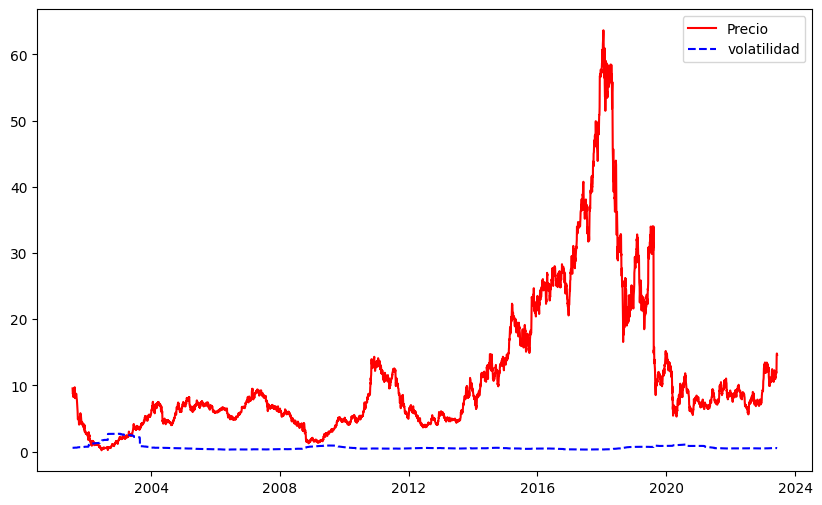

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df['Adj Close'], 'r-', label='Precio')
ax.plot(df['volatilidad'], 'b--', label='volatilidad')

plt.legend()
plt.show()

## Escalas diferentes

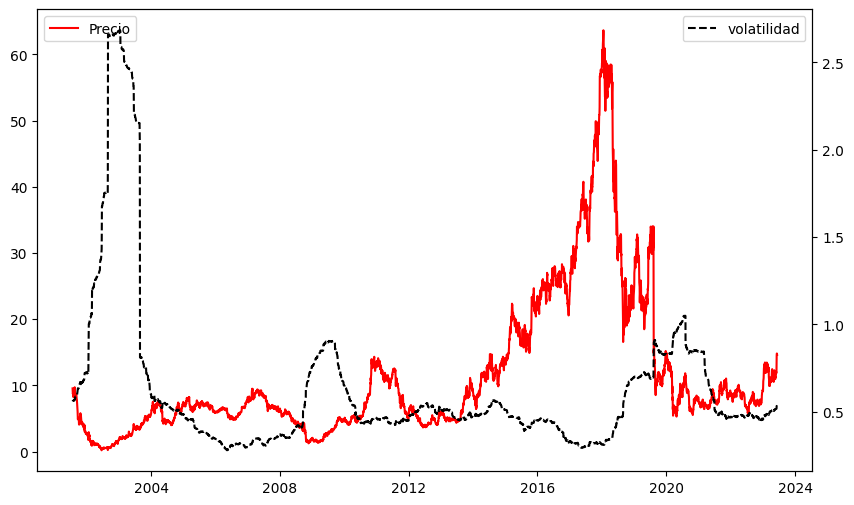

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df['Adj Close'], 'r-',  label='Precio')
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(df['volatilidad'], 'k--',  label='volatilidad')
ax2.legend(loc='upper right')


plt.show()

## Escalas lineales y logaritmicas juntas

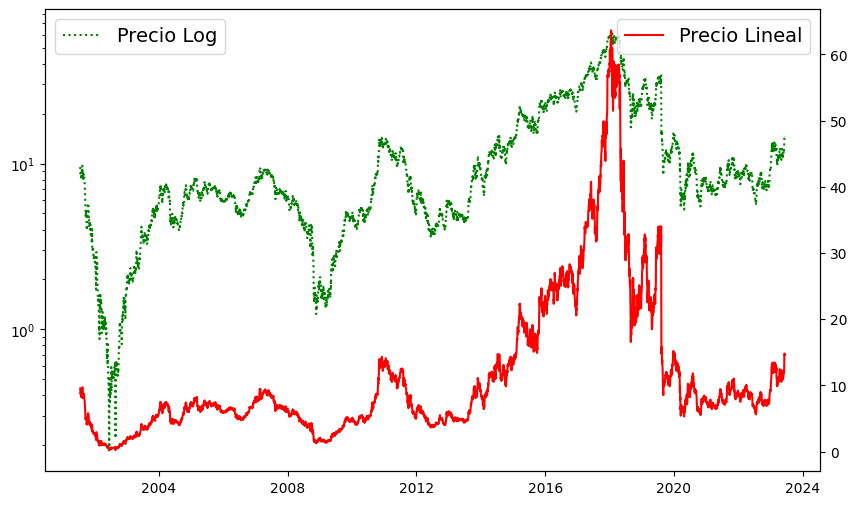

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df['Adj Close'], 'g:',label='Precio Log')
ax.set_yscale('log')
ax.legend(loc='upper left', fontsize=14)

ax2 = ax.twinx()
ax2.plot(df['Adj Close'], 'r-',label='Precio Lineal')
ax2.legend(loc='upper right', fontsize=14)

plt.show()

## Seteo de escalas de eje xlim/ylim

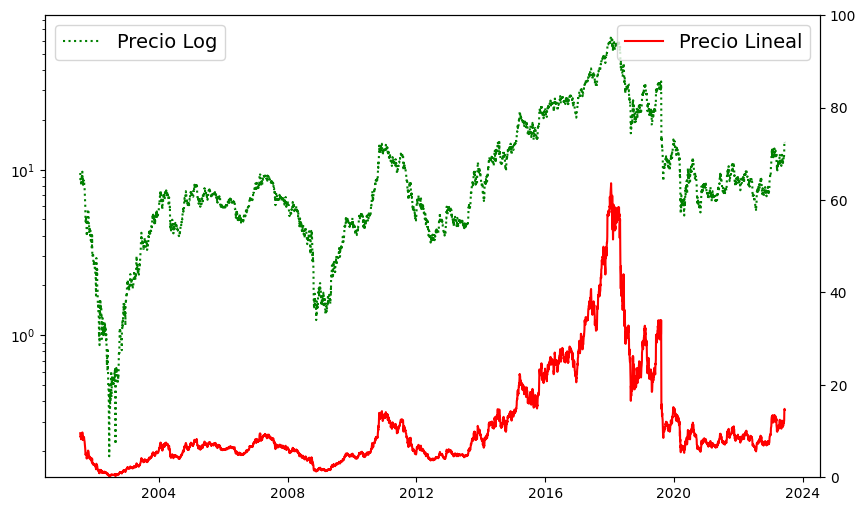

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df['Adj Close'], 'g:',label='Precio Log')
ax.set_yscale('log')
ax.legend(loc='upper left', fontsize=14)

ax2 = ax.twinx()
ax2.plot(df['Adj Close'], 'r-',label='Precio Lineal')
ax2.set_ylim(0,100)
ax2.legend(loc='upper right', fontsize=14)

plt.show()

# Subplots

In [ ]:
data = yf.download('GGAL', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


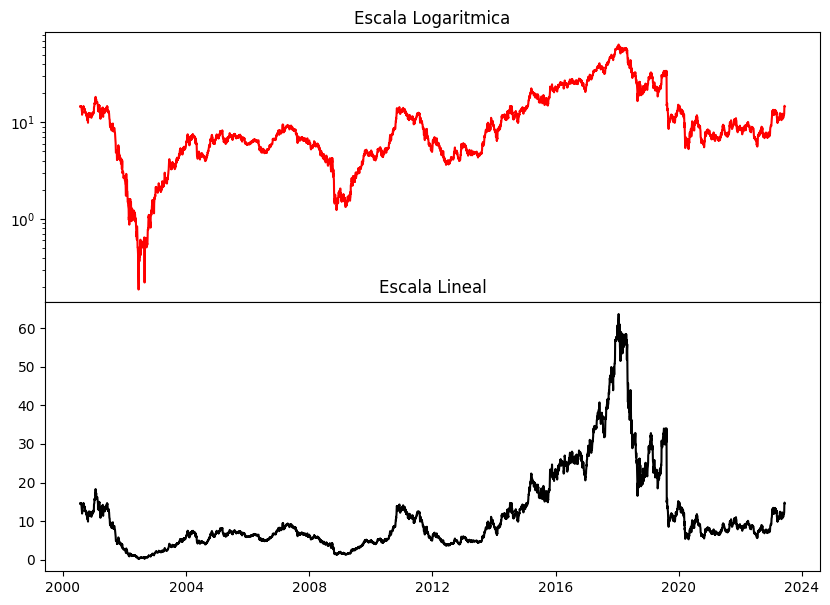

In [ ]:
fig, axs = plt.subplots(figsize=(10,7), nrows=2)

axs[0].plot(data.Close, c='red')
axs[0].set_yscale('log')
axs[0].title.set_text('Escala Logaritmica')

axs[1].plot(data.Close, c='k')
axs[1].set_yscale('linear')
axs[1].title.set_text('Escala Lineal')
fig.subplots_adjust(hspace=0)

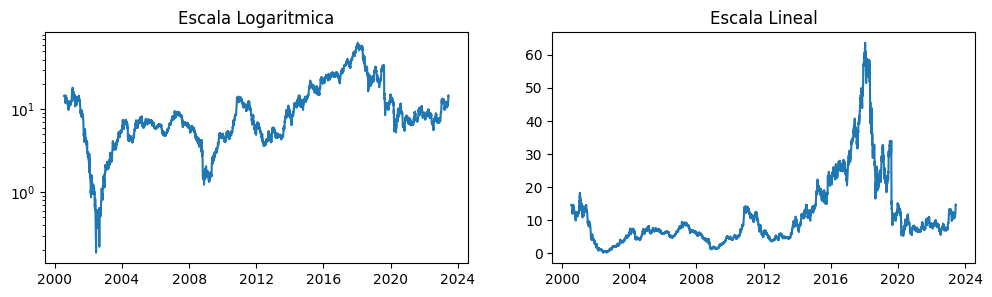

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(12,3))
axs[0].plot(data.Close)
axs[0].set_yscale('log')
axs[0].title.set_text('Escala Logaritmica')

axs[1].plot(data.Close)
axs[1].set_yscale('linear')
axs[1].title.set_text('Escala Lineal')
fig.subplots_adjust(hspace=0.4)

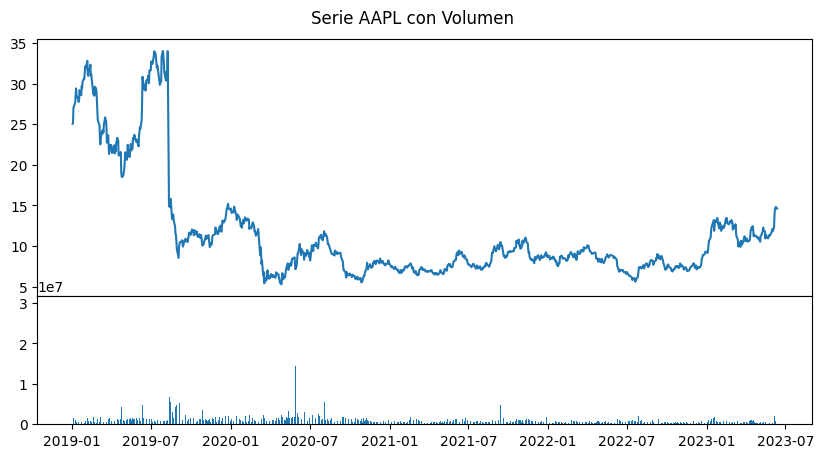

In [ ]:
precios2020 = data.loc[(data.index>='2019')]

fig, axs = plt.subplots(2, figsize=(10,5), gridspec_kw={'height_ratios':[2, 1]})
fig.suptitle('Serie AAPL con Volumen', y= 0.94)

axs[0].plot(precios2020.index, precios2020.Close)
axs[1].bar(precios2020.index, precios2020.Volume)
fig.subplots_adjust(hspace=0)

# Estilos predeterminados

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


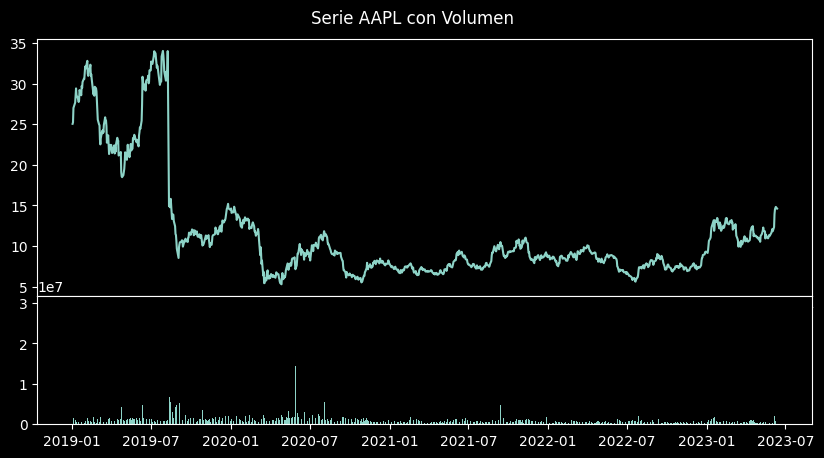

In [ ]:
plt.style.use('dark_background')

precios2020 = data.loc[(data.index>='2019')]

fig, axs = plt.subplots(2, figsize=(10,5), gridspec_kw={'height_ratios':[2, 1]})
fig.suptitle('Serie AAPL con Volumen', y= 0.94)

axs[0].plot(precios2020.index, precios2020.Close)
axs[1].bar(precios2020.index, precios2020.Volume)
fig.subplots_adjust(hspace=0)

# Parámetros Estadísticos

In [ ]:
df = yf.download('AAPL', auto_adjust='true', start='2001-01-01')
df['variacion'] = df.Close.pct_change()*100

volatilidad = df.variacion.groupby(df.index.year).std() * 250**0.5
volatilidad

[*********************100%***********************]  1 of 1 completed


Date
2001    62.324186
2002    48.265706
2003    36.934695
2004    40.271164
2005    38.703383
2006    38.366054
2007    37.563710
2008    57.973380
2009    33.787145
2010    26.652248
2011    26.151179
2012    29.355938
2013    28.439226
2014    21.571317
2015    26.630973
2016    23.245530
2017    17.535673
2018    28.627843
2019    26.034428
2020    46.464224
2021    25.002126
2022    35.554501
2023    22.037889
Name: variacion, dtype: float64

In [ ]:
df = yf.download('AAPL', auto_adjust='true', start='2001-01-01')
df['variacion'] = df.Close.pct_change()*100

volatilidad = df.variacion.groupby(df.index.year).std() * 250**0.5
skew = df.variacion.groupby(df.index.year).skew()
kurtosis= df.variacion.groupby(df.index.year).apply(pd.DataFrame.kurtosis)

parametros = pd.concat([volatilidad,skew,kurtosis], axis=1)
parametros.columns = ['volatilidad','skew','kurtosis']

parametros = parametros.dropna().round(2)
parametros

[*********************100%***********************]  1 of 1 completed


,volatilidad,skew,kurtosis
Date,,,
2001,62.32,0.15,1.49
2002,48.27,-0.37,2.79
2003,36.93,0.43,2.49
2004,40.27,1.30,4.55
2005,38.70,-0.00,1.42
2006,38.37,0.84,2.54
2007,37.56,0.06,2.18
2008,57.97,-0.16,2.79
2009,33.79,0.29,0.58


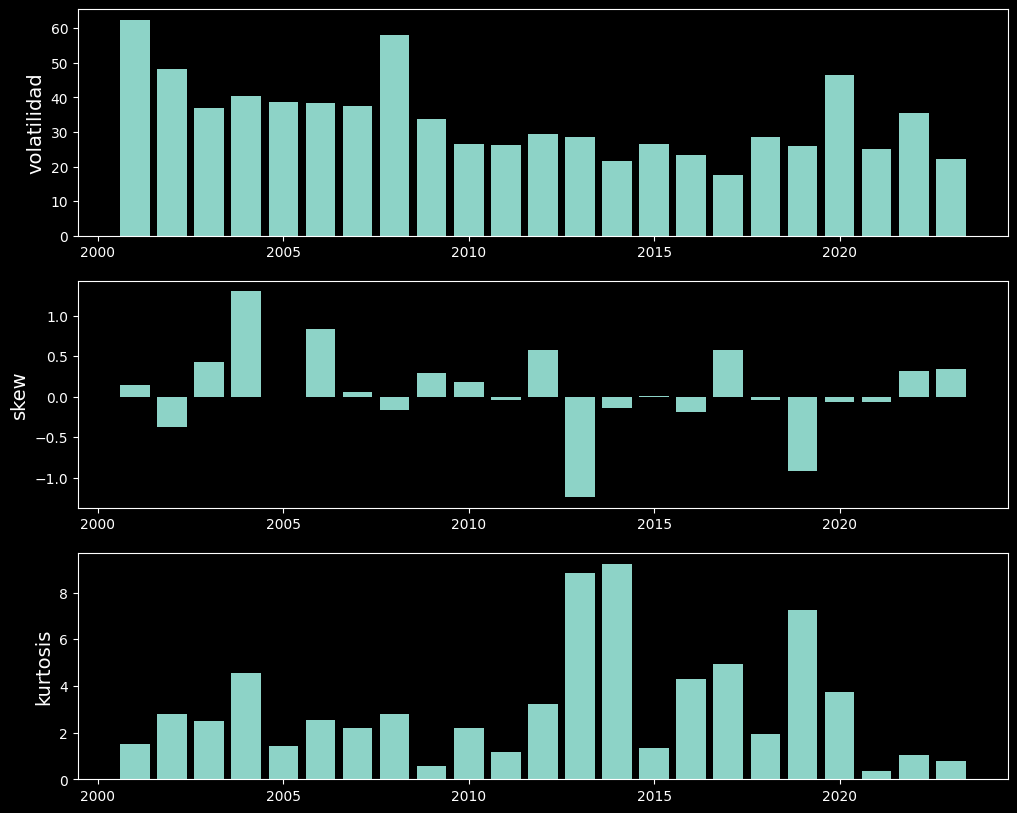

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,10), nrows=3)

claves = ['volatilidad','skew','kurtosis']
for i in range(len(claves)):
    ax[i].bar(parametros.index, parametros[claves[i]])
    ax[i].set_ylabel(claves[i], fontsize=14)

plt.show()

## Independencia Kurtosis/Volatilidad

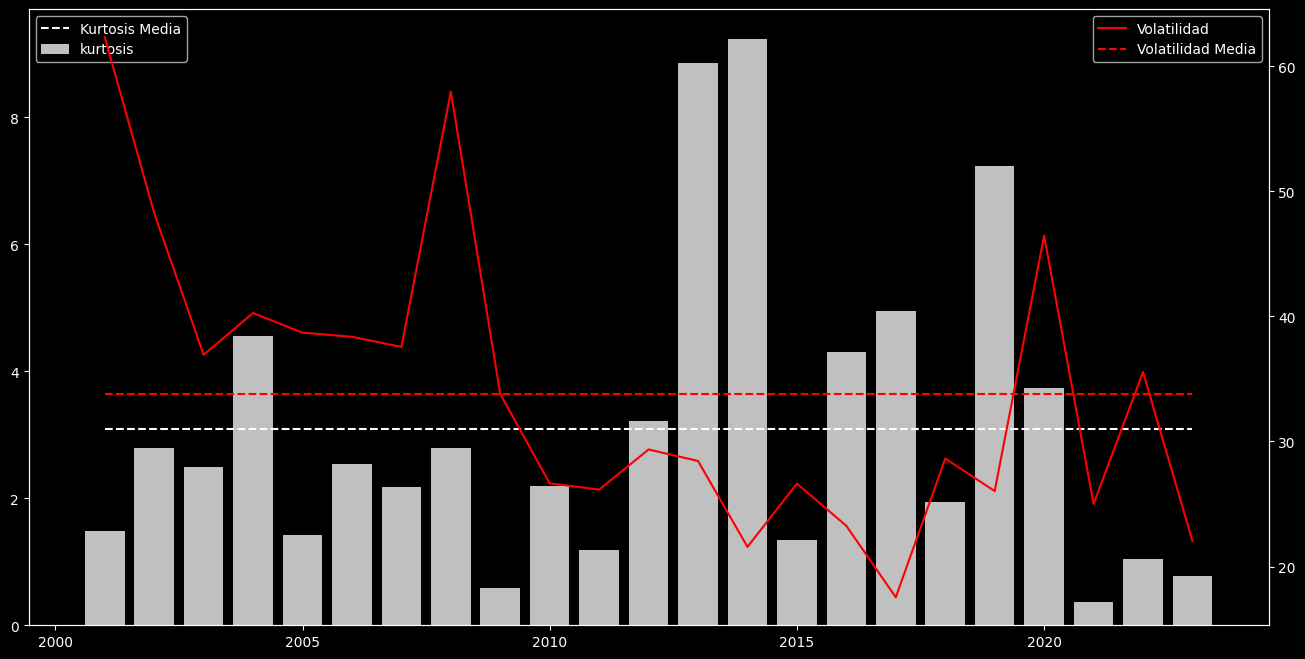

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.bar(parametros.index, parametros['kurtosis'], label='kurtosis', color='silver')
ax.plot(parametros.index, [parametros['kurtosis'].mean()]*len(parametros), 'w--', label='Kurtosis Media')

ax2 = ax.twinx()
ax2.plot(parametros['volatilidad'], color='red', label='Volatilidad')
ax2.plot(parametros.index, [parametros['volatilidad'].mean()]*len(parametros), 'r--', label='Volatilidad Media')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

## En un rolling view

In [ ]:
df = yf.download('AAPL', auto_adjust='true', start='2001-01-01')
df['variacion'] = df.Close.pct_change()*100

n=250
df['roll_vol'] = df.variacion.rolling(n).std() * 250**0.5
df['roll_kurt'] = df.variacion.rolling(n).apply(pd.DataFrame.kurtosis)
df = df.dropna().round(2)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume,variacion,roll_vol,roll_kurt
Date,,,,,,,,
2002-01-04,0.35,0.36,0.35,0.36,409976000,0.47,62.26,1.48
2002-01-07,0.36,0.36,0.35,0.35,444584000,-3.33,61.58,1.52
2002-01-08,0.35,0.35,0.34,0.34,450038400,-1.27,61.46,1.55
2002-01-09,0.35,0.35,0.32,0.33,327835200,-4.25,61.48,1.55
2002-01-10,0.32,0.33,0.31,0.32,452737600,-1.94,61.51,1.54
...,...,...,...,...,...,...,...,...
2023-06-06,179.97,180.12,177.43,179.21,64848400,-0.21,30.93,2.07
2023-06-07,178.44,181.21,177.32,177.82,61944600,-0.78,30.94,2.06
2023-06-08,177.90,180.84,177.46,180.57,50214900,1.55,30.75,2.12


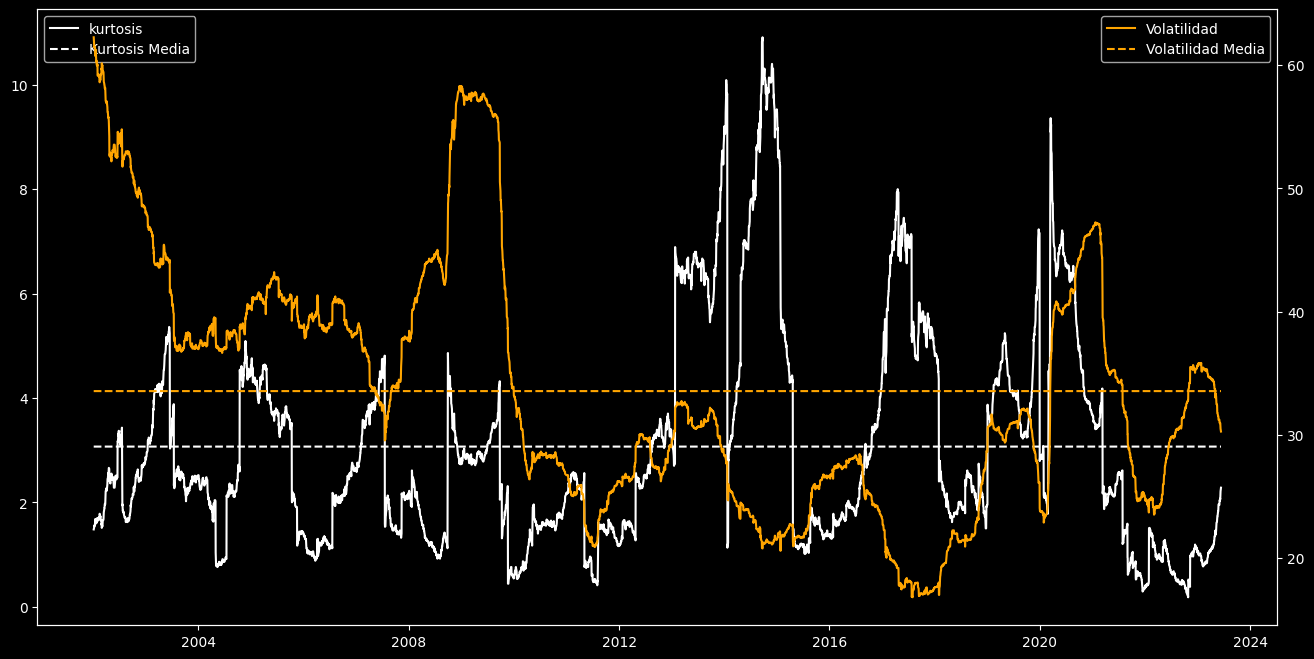

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(df['roll_kurt'], c='white', label='kurtosis')
ax.plot(df.index, [df['roll_kurt'].mean()]*len(df), c='white', ls='--', label='Kurtosis Media')
ax2 = ax.twinx()
ax2.plot(df['roll_vol'], color='orange', label='Volatilidad')
ax2.plot(df.index, [df['roll_vol'].mean()]*len(df), color='orange', ls='--', label='Volatilidad Media')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

## El skew

In [ ]:
df = yf.download('AAPL', auto_adjust='true', start='2001-01-01')
df['variacion'] = df.Close.pct_change()*100

n = 250
df['roll_skew'] = df.variacion.rolling(n).apply(pd.DataFrame.skew)
df = df.dropna().round(2)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume,variacion,roll_skew
Date,,,,,,,
2002-01-04,0.35,0.36,0.35,0.36,409976000,0.47,0.15
2002-01-07,0.36,0.36,0.35,0.35,444584000,-3.33,0.12
2002-01-08,0.35,0.35,0.34,0.34,450038400,-1.27,0.14
2002-01-09,0.35,0.35,0.32,0.33,327835200,-4.25,0.14
2002-01-10,0.32,0.33,0.31,0.32,452737600,-1.94,0.15
...,...,...,...,...,...,...,...
2023-06-06,179.97,180.12,177.43,179.21,64848400,-0.21,0.34
2023-06-07,178.44,181.21,177.32,177.82,61944600,-0.78,0.34
2023-06-08,177.90,180.84,177.46,180.57,50214900,1.55,0.34


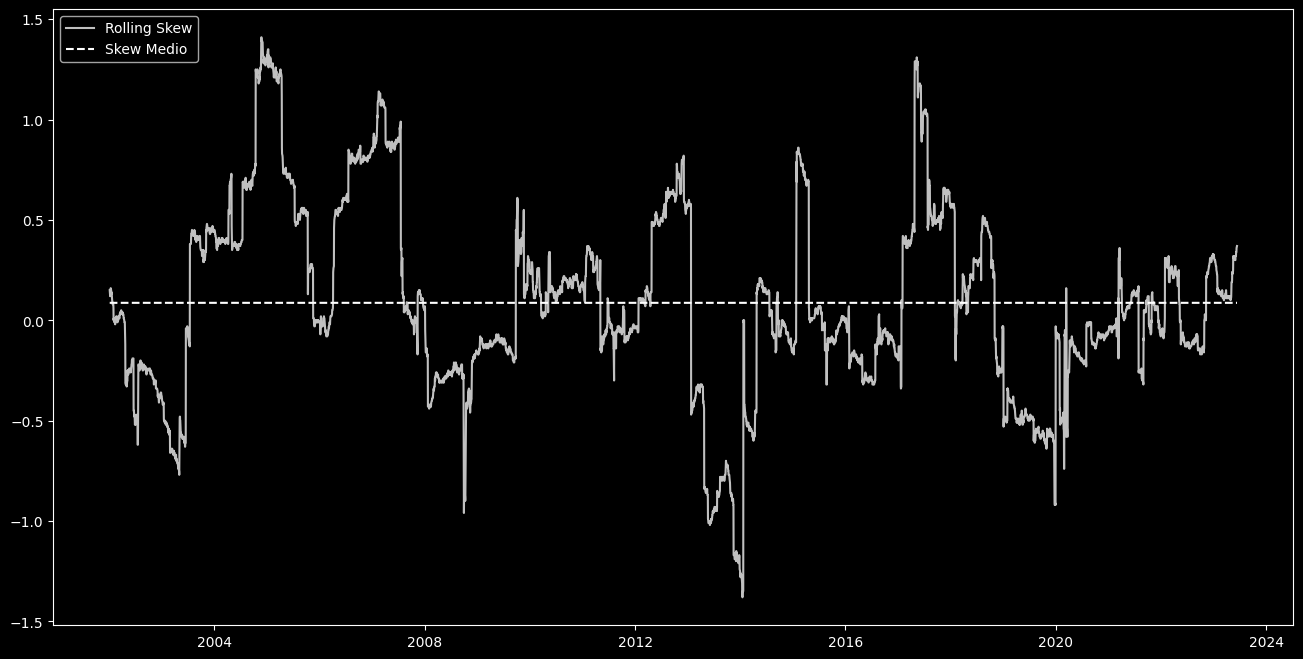

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(df['roll_skew'], c='silver', label='Rolling Skew')
ax.plot(df.index, [df['roll_skew'].mean()]*len(df), c='white', ls='--', label='Skew Medio')
ax.legend(loc='upper left')
plt.show()

## El skew, la distribucion, la media y mediana

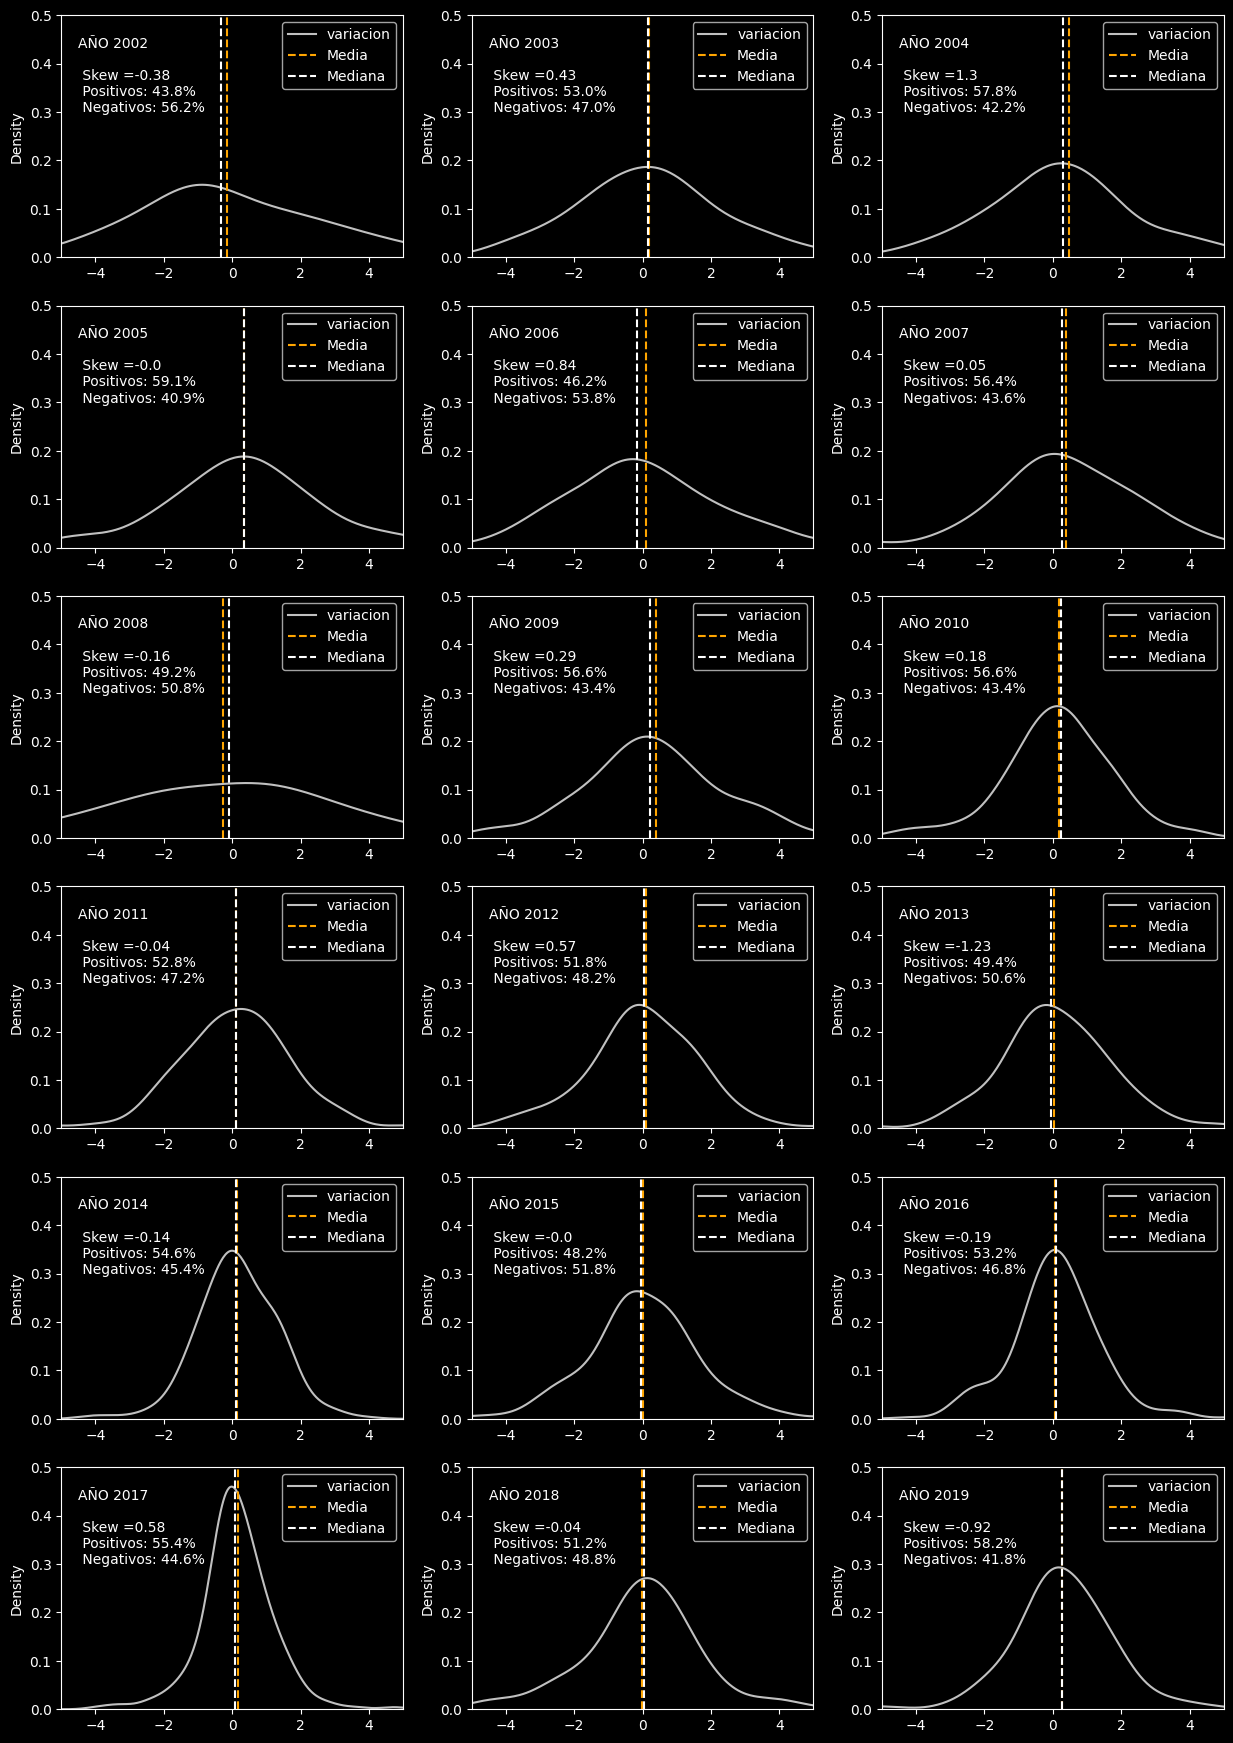

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt

filas= 6
columnas = 3
fig, ax = plt.subplots(figsize=(15,22), ncols=columnas, nrows=filas)

for año in range(2002,2020):
    row = (año-2002)//columnas
    col = (año-2002) % columnas

    filtro = df.loc[(df.index > dt.datetime(año,1,1))  & (df.index < dt.datetime(año,12,31))]
    ax[row][col] = filtro.variacion.plot(kind='kde', xlim=(-5,5), ylim=(0,0.5), color='silver', ax=ax[row][col])
    ax[row][col].axvline(x=filtro.variacion.mean(), color='orange', ls='--', label='Media')
    ax[row][col].axvline(x=filtro.variacion.median(), color='white', ls='--', label='Mediana')

    positivos = round(filtro.loc[filtro.variacion >= 0].variacion.count() / len(filtro) *100,1)
    negativos = round(filtro.loc[filtro.variacion < 0].variacion.count() / len(filtro) *100,1)
    skew = round(filtro.variacion.skew(),2)
    leyenda = 'AÑO '+str(año)+'\n\n Skew ='+str(skew)+'\n Positivos: '+str(positivos)+'%\n Negativos: '+str(negativos)+'%'
    ax[row][col].text(s = leyenda, y=0.3, x=-4.5)
    ax[row][col].legend(fontsize=10, loc='upper right')
plt.show()

## La Kurtosis

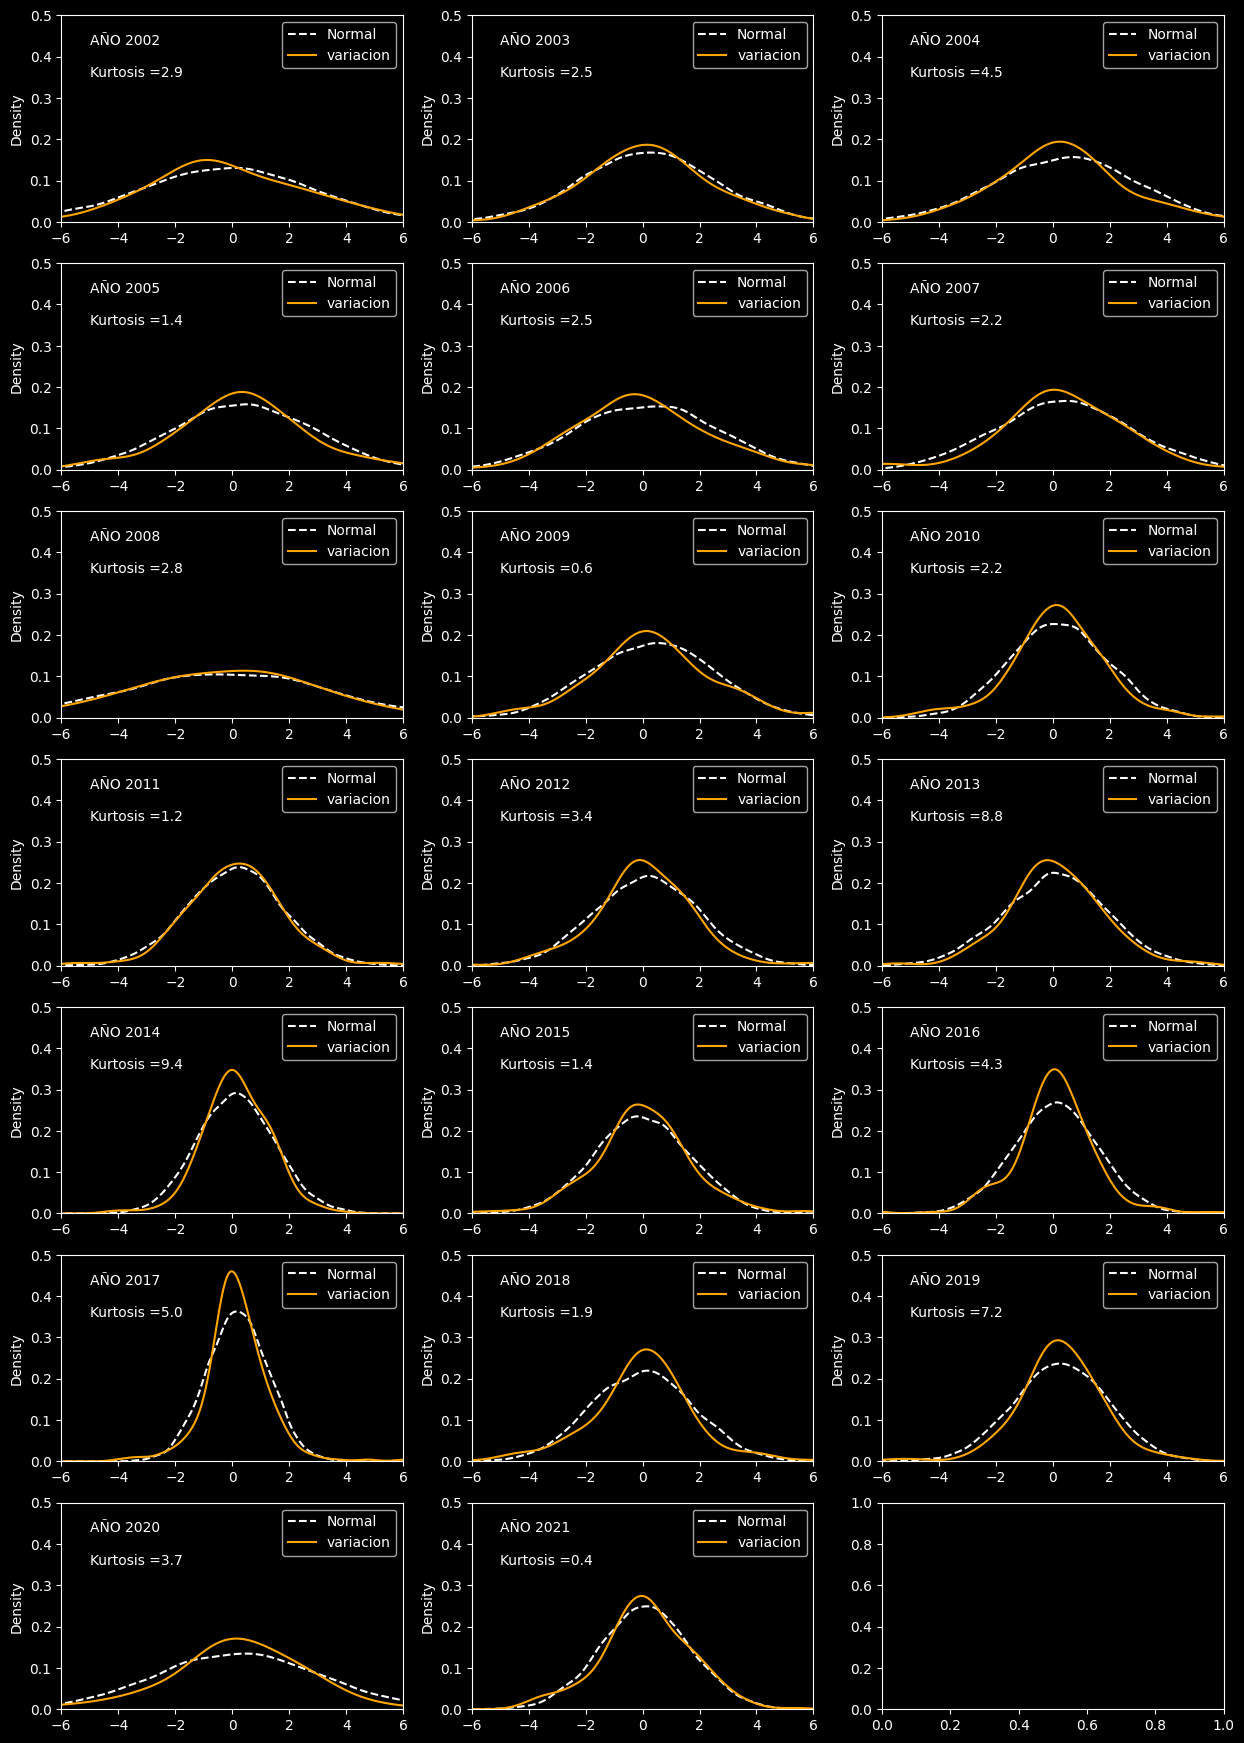

In [ ]:
from scipy import stats

filas= 7
columnas = 3
fig, ax = plt.subplots(figsize=(15,22), ncols=columnas, nrows=filas)

for año in range(2002,2022):
    row = (año-2002)//columnas
    col = (año-2002)%columnas

    filtro = df.loc[(df.index > dt.datetime(año,1,1))  & (df.index < dt.datetime(año,12,31))]

    normal = stats.norm.rvs(filtro.variacion.mean(),filtro.variacion.std(),5000)
    normal_df = pd.DataFrame(normal)
    normal_df.columns = ['Normal']

    ax[row][col] = normal_df.plot(kind='kde', ls='--', color='white', xlim=(-6,6), ylim=(0,0.5), ax=ax[row][col])
    ax[row][col] = filtro.variacion.plot(kind='kde', xlim=(-6,6), color='orange', ylim=(0,0.5), ax=ax[row][col])
    ax[row][col].text(s = 'AÑO '+str(año)+'\n\nKurtosis ='+str(round(filtro.variacion.kurtosis(),1)), y=0.35, x=-5)
    ax[row][col].legend(fontsize=10, loc='upper right')
plt.show()

In [ ]:
import requests, pandas as pd, yfinance as yf

top50 = ['AAPL', 'AMZN', 'MSFT', 'BA', 'META', 'NVDA', 'AMD', 'NFLX', 'GOOGL', 'GOOG', 'JPM', 'V', 'DIS',
         'BAC', 'INTC','MA', 'UAL', 'C', 'CRM', 'UNH', 'XOM', 'T', 'MU', 'WFC', 'JNJ', 'ADBE', 'PYPL',
         'HD', 'GILD', 'WMT', 'CSCO','PG', 'PFE', 'DAL', 'VZ', 'CVX', 'AAL', 'CMCSA', 'COST', 'QCOM',
         'BKNG', 'MRK', 'ABBV', 'BMY', 'KO', 'SBUX','MCD', 'RCL', 'AVGO', 'GS']

def getDataM(listado, start='2000-01-01', interval='1d', end=None):
    data = yf.download(listado, start=start, end=end, interval=interval, auto_adjust=True)
    return data.swaplevel(i=1, j=0, axis=1)

data_top = getDataM(top50, start='2020-01-01', end='2021-01-01')

[*********************100%***********************]  50 of 50 completed


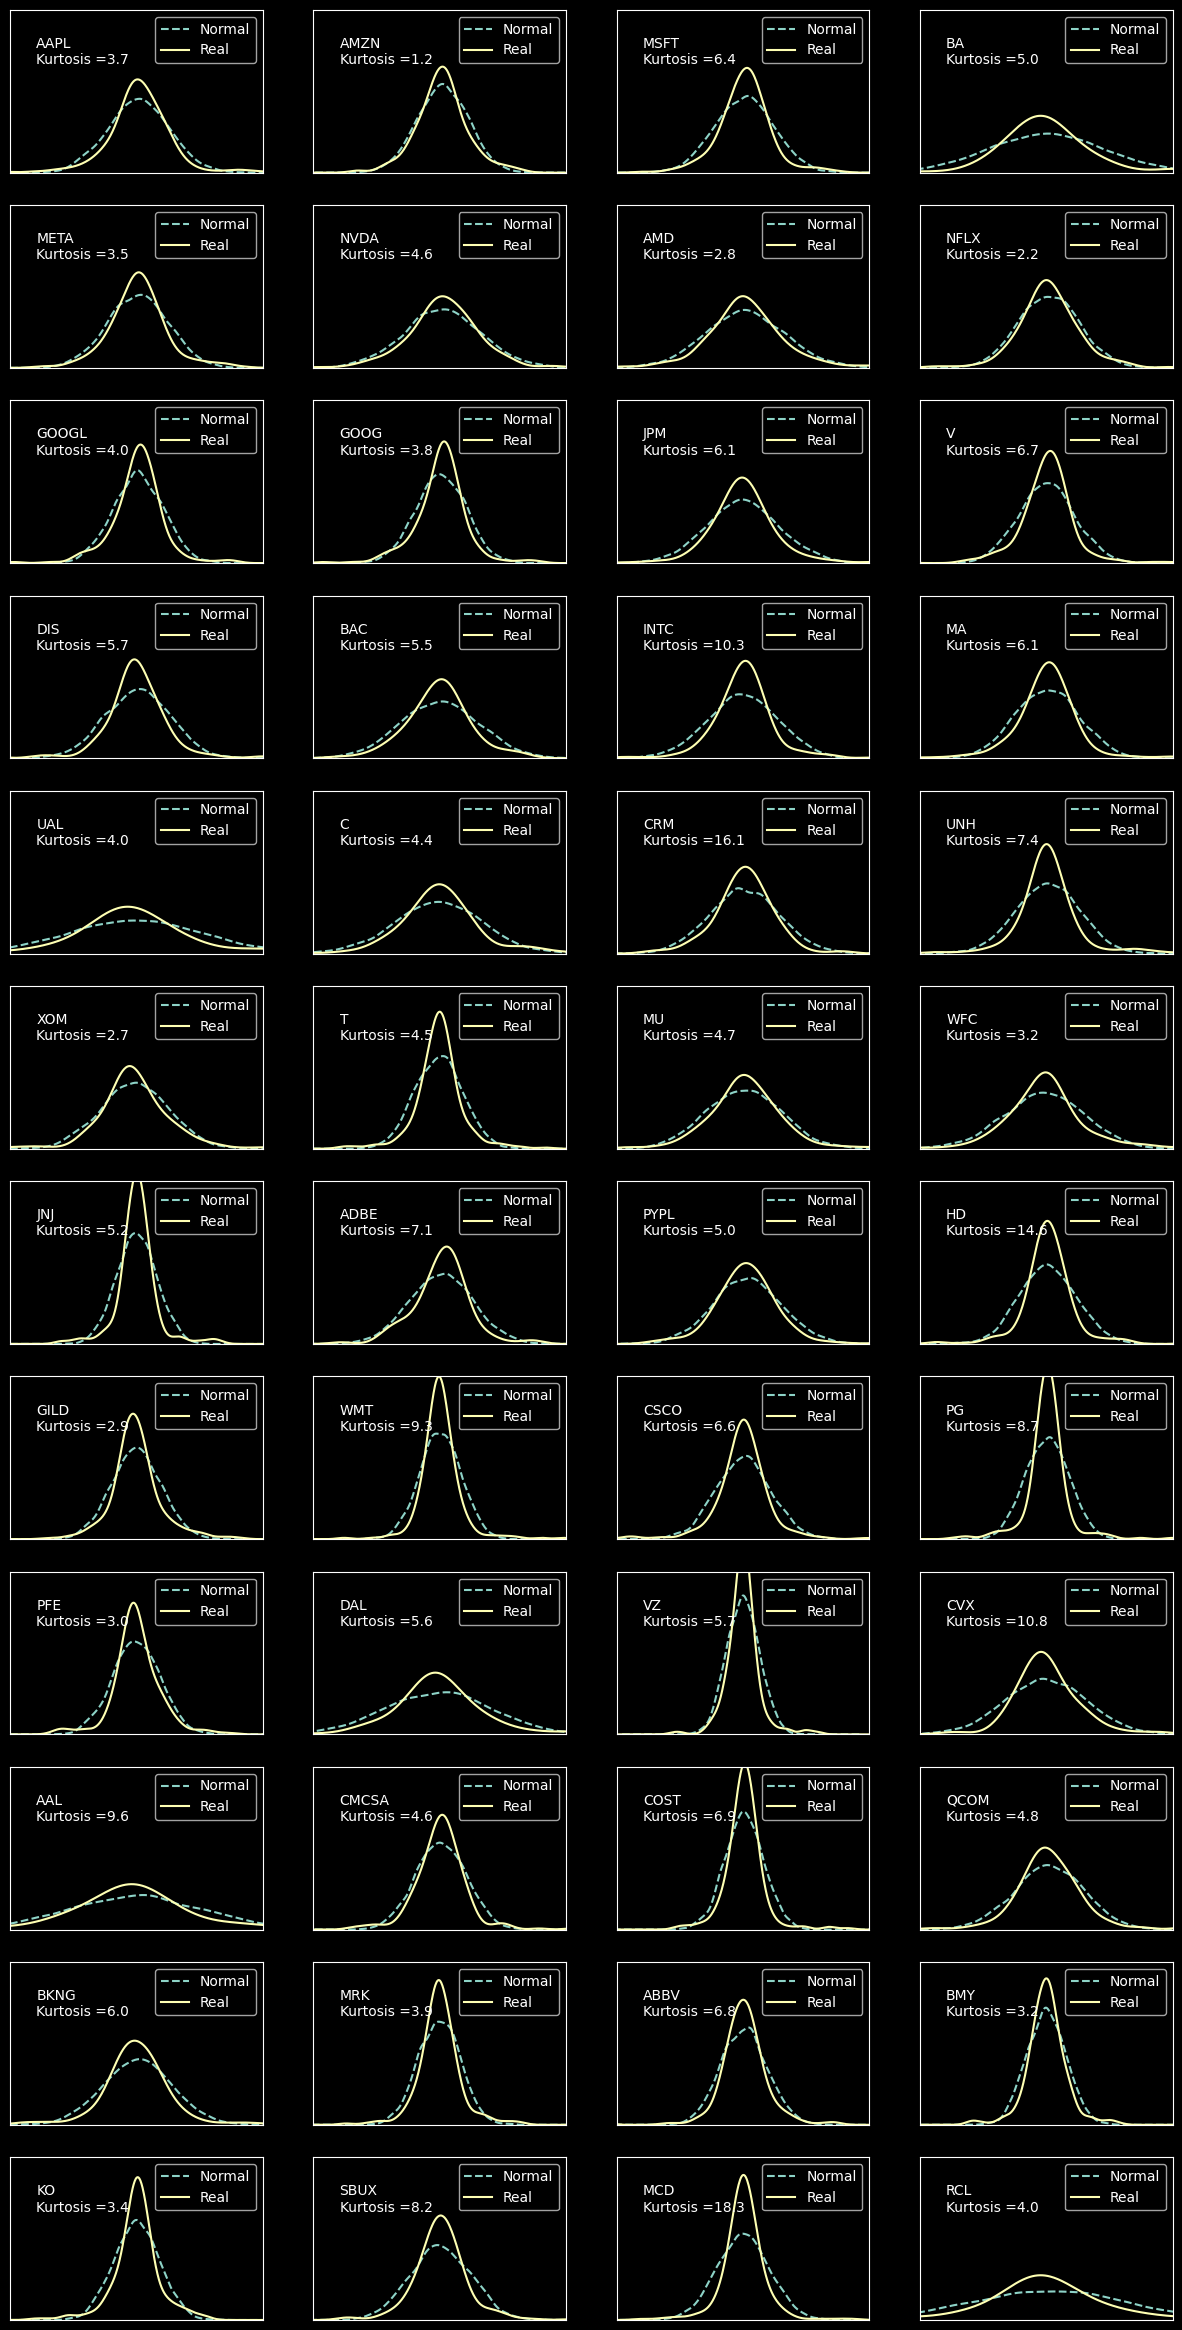

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

filas= 12
columnas = 4
fig, ax = plt.subplots(figsize=(15,30), ncols=columnas, nrows=filas)

for i in range(48):
    df = data_top[top50[i]].copy()
    df['variacion'] = df.Close.pct_change()*100
    row = (i)//columnas
    col = (i)%columnas

    normal = stats.norm.rvs(df.variacion.mean(),df.variacion.std(),5000)
    normal_df = pd.DataFrame(normal)
    normal_df.columns = ['Normal']

    ax[row][col] = normal_df.plot(kind='kde', ls='--', xlim=(-12,12), ylim=(0,0.3), ax=ax[row][col])
    ax[row][col] = df.variacion.plot(kind='kde', xlim=(-12,12), ylim=(0,0.3), ax=ax[row][col], label='Real')
    ax[row][col].text(s = top50[i]+'\nKurtosis ='+str(round(df.variacion.kurtosis(),1)), y=0.2, x=-9.5)
    ax[row][col].legend(fontsize=10, loc='upper right')
    ax[row][col].set_ylabel('')
    ax[row][col].axes.xaxis.set_visible(False)
    ax[row][col].axes.yaxis.set_visible(False)

plt.show()

### Vemos los valores de las colas

In [ ]:
data_top = getDataM(top50, start='2016-01-01')

[*********************100%***********************]  50 of 50 completed


KDE stocks mas operados sp500 vista de la curtosis en extremos de la dist. 2015-2020
Línea gris: Modelado normal con sigma y mu de la distr. real. Línea Azul: Distr real


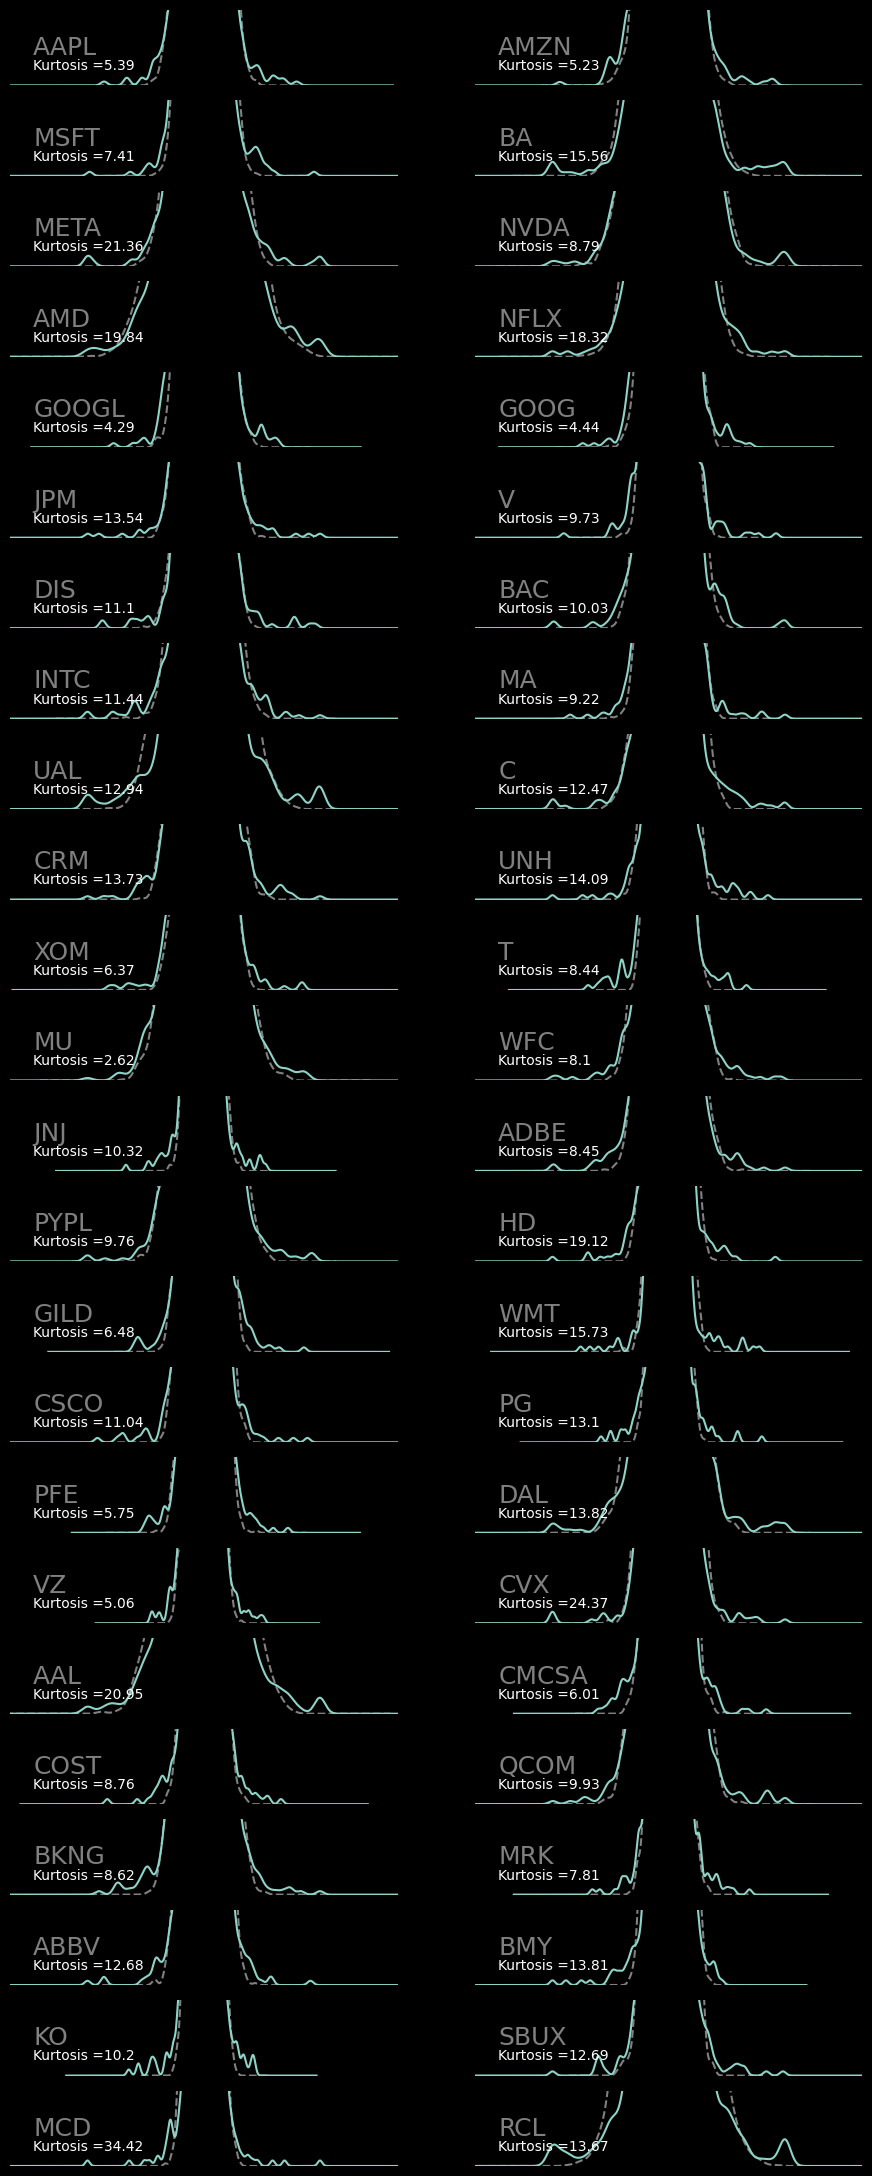

In [ ]:
filas= 24
columnas = 2
fig, ax = plt.subplots(figsize=(11,28), ncols=columnas, nrows=filas)

for i in range(48):
    df = data_top[top50[i]].copy()
    df['variacion'] = df.Close.pct_change()*100
    k = round(df.variacion.kurtosis(),2)
    row = (i)//columnas
    col = (i)%columnas

    normal = stats.norm.rvs(df.variacion.mean(),df.variacion.std(),5000)
    normal_df = pd.DataFrame(normal)

    ax[row][col] = normal_df.plot(kind='kde', c='gray', ls='--', xlim=(-15,15), ylim=(0,0.01), ax=ax[row][col], legend=False)
    df['variacion'] = df['variacion'].clip(-15,15)
    ax[row][col] = df.variacion.plot(kind='kde', xlim=(-25,25), ylim=(0,0.01), ax=ax[row][col], label='Real')
    ax[row][col].text(s = top50[i], fontsize=18, y=0.004, color='gray', x=-22)
    ax[row][col].text(s = '\nKurtosis ='+str(k), fontsize=10, y=0.002, x=-22)
    ax[row][col].axes.xaxis.set_visible(False)
    ax[row][col].axes.yaxis.set_visible(False)
    ax[row][col].axis('off')

print('KDE stocks mas operados sp500 vista de la curtosis en extremos de la dist. 2015-2020')
print('Línea gris: Modelado normal con sigma y mu de la distr. real. Línea Azul: Distr real')
plt.show()

# Ejercicio Integrador

Hacer el mismo gráfico del tweet citado, pero para los activos del SP500, desde 1980 usando yfinance y en lugar de usar rendimientos anuales usar trimestrales (para compensar que tenemos menos cantidad de datos)

Vamos a usar como tenencia mínima para graficar 5 años (20 trimestres)

Ojo que por ejemplo para 1 solo activo que cotiza 40 años (160 trimestres), con estas condiciones voy a tener por ejemplo para un holding de 20 trimestres, un total de 140 rendimientos para 1 solo activo... si si, osea, Q1-Q21, Q2-Q22 y asi hasta Q140-Q160

https://twitter.com/WallStreetTom/status/1382354529019105283

# Resolucion posible

## Bajamos los tickers del SP500

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_tickers = list(sp500.Symbol)
sp500_tickers = [e.replace('.','-') for e in sp500_tickers]

sp500_tickers[:5], len(sp500_tickers)

# Es el mismo script visto en clase con la mejora que prouso Valentino

(['MMM', 'AOS', 'ABT', 'ABBV', 'ACN'], 503)

## Bajamos los cierres diarios de esos tickers

In [ ]:
%%time

tickers = sp500_tickers
data = yf.download(tickers, start='1980-01-01')['Adj Close']

[*********************100%***********************]  503 of 503 completed
CPU times: user 52.3 s, sys: 2.75 s, total: 55.1 s
Wall time: 1min 24s


## Calculamos matriz de rendimientos trimestrales por ticker

In [ ]:
pd.options.display.max_rows = 10
pd.options.display.max_columns = 10

base_1 = (data.pct_change()+1).cumprod()
grupos = base_1.groupby(data.index.to_period('Q'))
rendimientos = grupos.last().pct_change()
rendimientos

,A,AAL,AAP,AAPL,ABBV,...,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,
1980Q1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
1980Q2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.215190,NaN
1980Q3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.052084,NaN
1980Q4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.237623,NaN
1981Q1,NaN,NaN,NaN,-0.282053,NaN,...,NaN,NaN,NaN,0.120001,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022Q2,-0.101062,-0.305205,-0.156309,-0.215847,-0.047179,...,-0.037606,-0.176720,-0.289461,-0.218201,-0.086956
2022Q3,0.025219,-0.050473,-0.088732,0.012229,-0.115530,...,-0.058573,-0.002628,-0.108658,0.006208,-0.135714
2022Q4,0.235151,0.056478,-0.049613,-0.058281,0.216410,...,0.209959,0.221825,-0.021373,-0.025546,-0.009634


## Armamos diccionario con los quantiles para cada posible hold period

In [ ]:
%%time
quantiles = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]

results = {}
results_quantiles = {}
for q_trim in range(20,len(rendimientos)):
    results[q_trim] = []
    for i in range(0, len(rendimientos)-q_trim):
        r = (rendimientos.iloc[i:i+q_trim]+1).prod()**(4/q_trim)-1
        rlist = [x for x in r.to_list() if x != 0]
        results[q_trim] += rlist
    results_quantiles[q_trim] = pd.DataFrame(results[q_trim]).quantile(quantiles)
    print(q_trim,'   ',end='\r')

CPU times: user 17.1 s, sys: 245 ms, total: 17.3 s
Wall time: 17.4 s


## Lo pasamos a DataFrame

In [ ]:
df = pd.concat(results_quantiles, axis=1)
df.columns = list(range(20,len(rendimientos)))
df

,20,21,22,23,24,...,169,170,171,172,173
0.00,-0.697490,-0.679766,-0.662755,-0.646435,-0.630781,...,-0.033310,-0.033117,-0.032927,-0.032739,-0.032553
0.10,-0.030471,-0.027129,-0.023253,-0.020047,-0.016312,...,0.032980,0.032521,0.032381,0.033171,0.033081
0.25,0.047230,0.048799,0.050325,0.051902,0.053353,...,0.059932,0.058894,0.058733,0.059563,0.059421
0.50,0.128700,0.128225,0.127785,0.127685,0.126955,...,0.097260,0.096276,0.095557,0.096837,0.095718
0.75,0.215690,0.213489,0.210620,0.207374,0.204786,...,0.130970,0.130556,0.131305,0.132231,0.131482
0.90,0.313557,0.308548,0.303692,0.297791,0.293245,...,0.152306,0.151718,0.152018,0.153817,0.153525
1.00,1.952636,1.998435,1.828621,1.655557,1.530132,...,0.260129,0.258416,0.256726,0.255057,0.251652


## Pasamos a retornos logarítmicos

In [ ]:
res = np.log(df.T+1)
res.index.name = 'trimestres_hold'
res

,0.00,0.10,0.25,0.50,0.75,0.90,1.00
trimestres_hold,,,,,,,
20,-1.195640,-0.030945,0.046149,0.121066,0.195312,0.272739,1.082698
21,-1.138705,-0.027503,0.047645,0.120645,0.193500,0.268918,1.098090
22,-1.086945,-0.023527,0.049100,0.120255,0.191133,0.265201,1.039789
23,-1.039687,-0.020251,0.050600,0.120167,0.188448,0.260664,0.976654
24,-0.996367,-0.016446,0.051978,0.119519,0.186302,0.257155,0.928271
...,...,...,...,...,...,...,...
169,-0.033877,0.032448,0.058205,0.092816,0.123076,0.141766,0.231214
170,-0.033678,0.032003,0.057225,0.091919,0.122710,0.141255,0.229854
171,-0.033481,0.031868,0.057073,0.091263,0.123372,0.141515,0.228510


## Graficamos esa belleza

Text(0, 0.5, 'Distribucion de rendimientos')

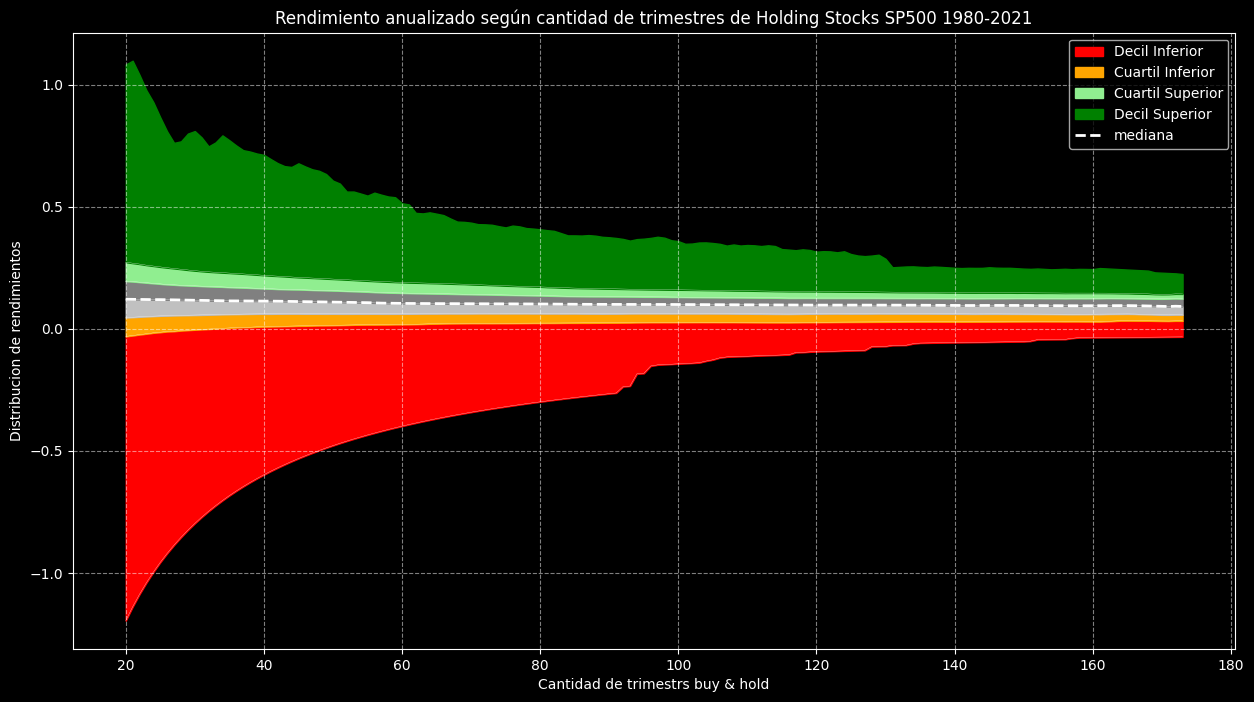

In [ ]:
import matplotlib.pyplot as plt

quantiles = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]
colores = ['red', 'orange', 'silver', 'gray', 'lightgreen', 'green']
labels = ['Decil Inferior', 'Cuartil Inferior', '','', 'Cuartil Superior', 'Decil Superior']

fig, ax = plt.subplots(figsize=(15,8))

for i in range(len(labels)):
    ax.fill_between(res.index, res[quantiles[i]], res[quantiles[i+1]], color=colores[i], label=labels[i])
    ax.plot(res[quantiles[i]], c='w', lw=0.2)

ax.plot(res[0.5], c='white', lw=2, ls='--', label='mediana')
ax.set_title('Rendimiento anualizado según cantidad de trimestres de Holding Stocks SP500 1980-2021')
ax.legend()
ax.grid(alpha=0.5, ls='--')
ax.set_xlabel('Cantidad de trimestrs buy & hold')
ax.set_ylabel('Distribucion de rendimientos')